In [2]:
#pip install pydotplus

In [3]:
#pip install graphviz

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import scikitplot as skplt
%pylab inline
from sklearn import preprocessing
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import category_scatter
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', None)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import KFold, StratifiedKFold

Populating the interactive namespace from numpy and matplotlib


In [9]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Importing the Data

In [10]:
df = pd.read_csv(r'C:\Users\sarav\Desktop\Churn\IBM_Telecom_Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Overview and Cleaning

In [11]:
df.shape #rows vs columns

(7043, 21)

In [12]:
df.info() # Columns and its data type
#numerical columns - int - seniorcitizen, tenure and - float - monthlycharges, totalcharges
#total charges need to be float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [13]:
df.isnull().sum() #checking for missing values 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.duplicated().sum()#checking for duplicates

0

In [15]:
df.nunique() # To identify the unique value types in the columns

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [16]:
for col in df.dtypes[df.dtypes == object].index:
    print(col, df[col].unique()) 
# To identify the unique value types in the columns

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


In [17]:
df['TotalCharges'] #current dtype is numerical

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [18]:
#TotalCharges column should be numerical
df.TotalCharges = df.TotalCharges.astype(float)  
#ValueError: could not convert string to float: 

ValueError: could not convert string to float: 

In [20]:
#Is there any NaN values as error says string?
df["TotalCharges"].isna().sum() 

0

In [21]:
#Checking for space are blank values
df["TotalCharges"].isin([' ']).any()

True

In [22]:
#Checking for rows having space as TotalCharge
df["TotalCharges"].isin([' ']).sum() 

11

In [23]:
#what are the MonthlyCharge and Tenure when TotalCharge is a space/blank value
for i in range(len(df)):
    if df["TotalCharges"][i] == " ":
        print("Tenure is %s and Monthly charges are %s" % (df.tenure[i], df.MonthlyCharges[i]))

Tenure is 0 and Monthly charges are 52.55
Tenure is 0 and Monthly charges are 20.25
Tenure is 0 and Monthly charges are 80.85
Tenure is 0 and Monthly charges are 25.75
Tenure is 0 and Monthly charges are 56.05
Tenure is 0 and Monthly charges are 19.85
Tenure is 0 and Monthly charges are 25.35
Tenure is 0 and Monthly charges are 20.0
Tenure is 0 and Monthly charges are 19.7
Tenure is 0 and Monthly charges are 73.35
Tenure is 0 and Monthly charges are 61.9


In [24]:
#Total charges are blank when tenure is 0, may be short term customers or travellers. 
#since Tenure is zero lets consider their TotalCharges were also zero
df["TotalCharges"].replace([" "], ["0"], inplace= True)

In [25]:
#TotalCharges to numerical
df["TotalCharges"] = df.TotalCharges.astype(float)

In [26]:
df["TotalCharges"].isin(['0']).sum() 

11

## Exploratory Data Analysis

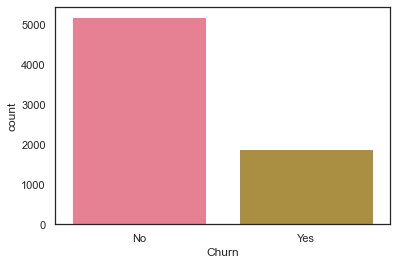

In [27]:
sns.set(style="white", palette='husl', color_codes=True)
sns.despine(left=True)
sns.countplot(df["Churn"]);

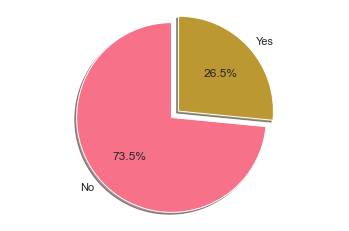

In [28]:
plt.pie(df["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=df["Churn"].unique())
plt.axis("equal") ;

In [29]:
temp_tenure = np.array(df["tenure"].tolist())
print("min: {}".format(temp_tenure.min()))
print("max: {}".format(temp_tenure.max()))

min: 0
max: 72


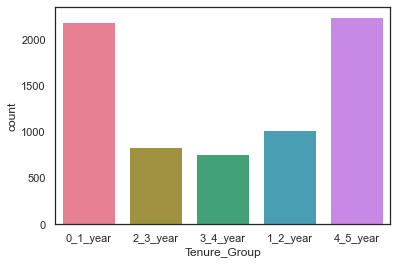

In [30]:
def tenure_to_group(df):
    if df["tenure"] <=12:
        return "0_1_year"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "1_2_year"
    elif (df["tenure"] > 24) & (df["tenure"] <= 36) :
        return "2_3_year"
    elif (df["tenure"] > 36) & (df["tenure"] <= 48) :
        return "3_4_year"
    elif df["tenure"] > 48 & (df["tenure"] <= 60):
        return "4_5_year"
    elif df["tenure"] > 60 & (df["tenure"] <= 72):
        return "5_6_year"
df["Tenure_Group"] = df.apply(lambda df:tenure_to_group(df),axis = 1)
sns.countplot(df["Tenure_Group"],palette='husl');

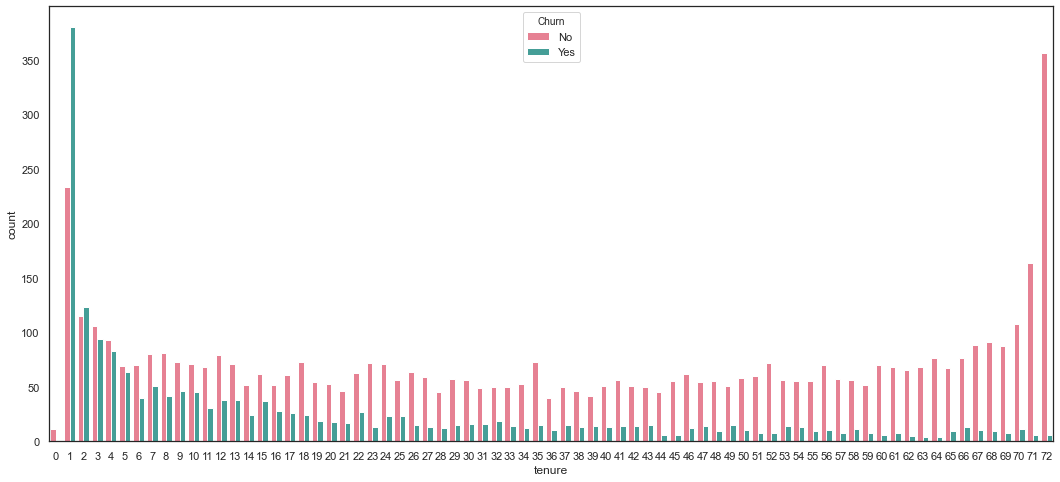

In [31]:
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(df["tenure"],hue = df["Churn"],palette='husl');

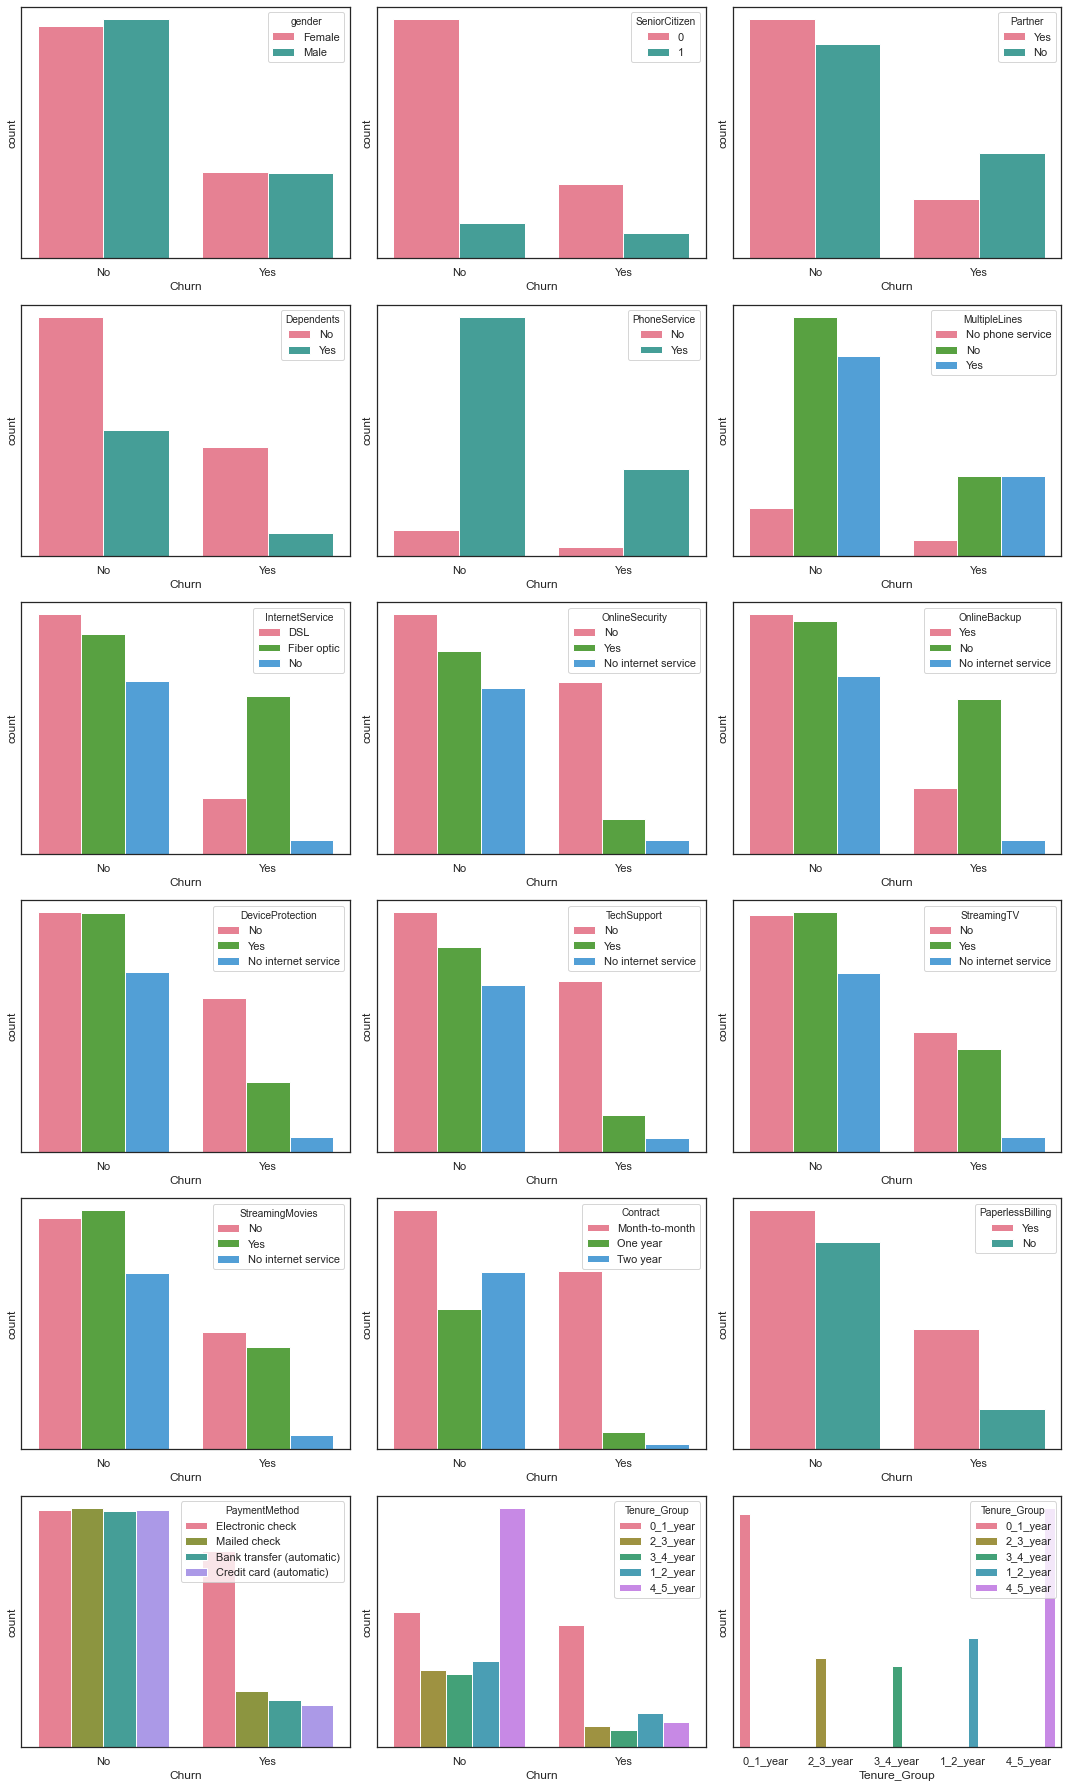

In [32]:
f, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 25))

sns.countplot(df["Churn"],hue = df["gender"],palette='husl',ax = axes[0,0])
sns.countplot(df["Churn"],hue = df["SeniorCitizen"],palette='husl',ax = axes[0,1])
sns.countplot(df["Churn"],hue = df["Partner"],palette='husl',ax = axes[0,2])
sns.countplot(df["Churn"],hue = df["Dependents"],palette='husl',ax = axes[1,0])
sns.countplot(df["Churn"],hue = df["PhoneService"],palette='husl',ax = axes[1,1])
sns.countplot(df["Churn"],hue = df["MultipleLines"],palette='husl',ax = axes[1,2])
sns.countplot(df["Churn"],hue = df["InternetService"],palette='husl',ax = axes[2,0])
sns.countplot(df["Churn"],hue = df["OnlineSecurity"],palette='husl',ax = axes[2,1])
sns.countplot(df["Churn"],hue = df["OnlineBackup"],palette='husl',ax = axes[2,2])
sns.countplot(df["Churn"],hue = df["DeviceProtection"],palette='husl',ax = axes[3,0])
sns.countplot(df["Churn"],hue = df["TechSupport"],palette='husl',ax = axes[3,1])
sns.countplot(df["Churn"],hue = df["StreamingTV"],palette='husl',ax = axes[3,2])
sns.countplot(df["Churn"],hue = df["StreamingMovies"],palette='husl',ax = axes[4,0])
sns.countplot(df["Churn"],hue = df["Contract"],palette='husl',ax = axes[4,1])
sns.countplot(df["Churn"],hue = df["PaperlessBilling"],palette='husl',ax = axes[4,2])
sns.countplot(df["Churn"],hue = df["PaymentMethod"],palette='husl',ax = axes[5,0])
sns.countplot(df["Churn"],hue = df["Tenure_Group"],palette='husl',ax = axes[5,1])
sns.countplot(df["Tenure_Group"],hue = df["Tenure_Group"],palette='husl',ax = axes[5,2]);

plt.setp(axes, yticks=[])
plt.tight_layout()


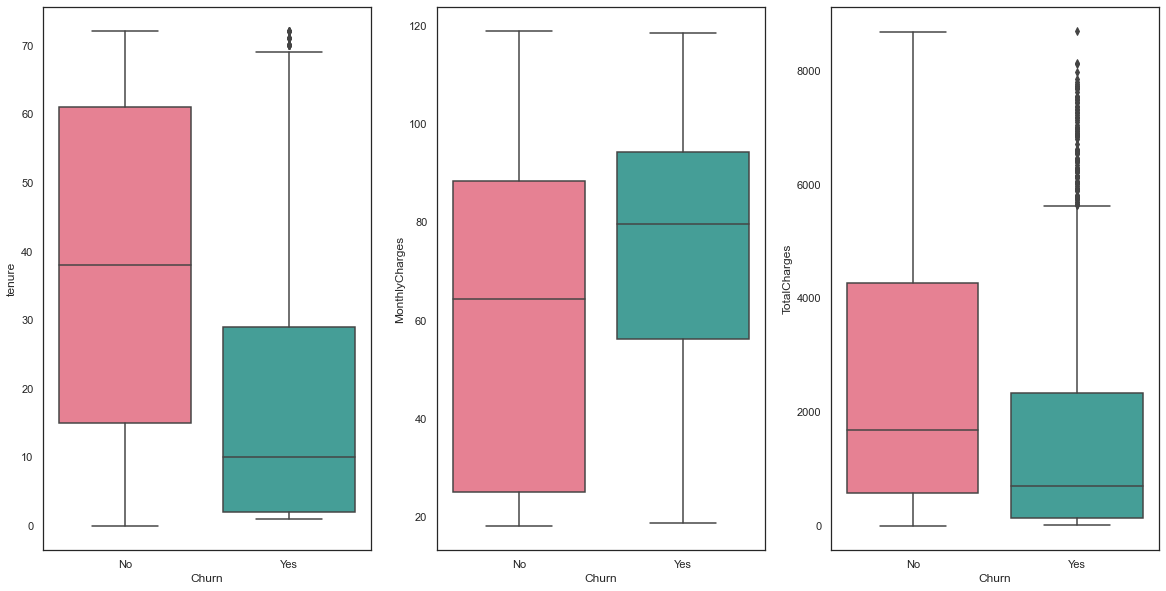

In [33]:
f, axes = plt.subplots( ncols=3, figsize=(20, 10))
sns.boxplot(x="Churn", y="tenure", data=df,palette='husl',ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=df,palette='husl',ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=df,palette='husl',ax = axes[2]);

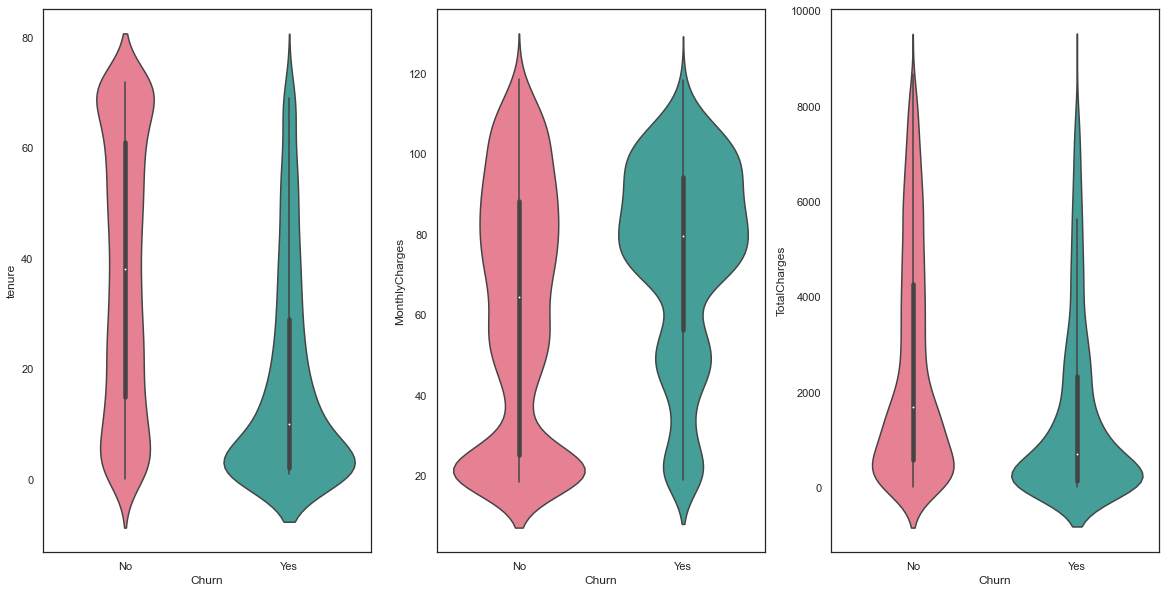

In [34]:
f, axes = plt.subplots( ncols=3, figsize=(20, 10))
sns.violinplot(x="Churn", y="tenure", data=df,palette='husl',ax = axes[0]);
sns.violinplot(x="Churn", y="MonthlyCharges", data=df,palette='husl',ax = axes[1])
sns.violinplot(x="Churn", y="TotalCharges", data=df,palette='husl',ax = axes[2]);

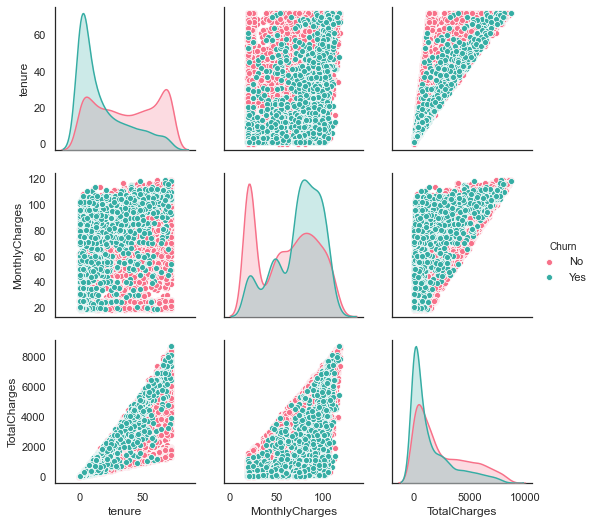

In [35]:
temp_cols = df.drop("SeniorCitizen",axis = 1)
sns.pairplot(temp_cols,hue='Churn',palette='husl');

In [36]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [37]:
df.describe().T #Transposed for easier visualization

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [38]:
df.groupby('Churn').describe().T

Churn                          No          Yes
SeniorCitizen  count  5174.000000  1869.000000
               mean      0.128721     0.254682
               std       0.334923     0.435799
               min       0.000000     0.000000
               25%       0.000000     0.000000
               50%       0.000000     0.000000
               75%       0.000000     1.000000
               max       1.000000     1.000000
tenure         count  5174.000000  1869.000000
               mean     37.569965    17.979133
               std      24.113777    19.531123
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5174.000000  1869.000000
               mean     61.265124    74.441332
               std      31.092648    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.425000    79.650000
               75%      88.400000    94.200000
               max     118.750000   118.350000
TotalCharges   count  5174.000000  1869.000000
               mean   2549.911442  1531.796094
               std    2329.954215  1890.822994
               min       0.000000    18.850000
               25%     572.900000   134.500000
               50%    1679.525000   703.550000
               75%    4262.850000  2331.300000
               max    8672.450000  8684.800000

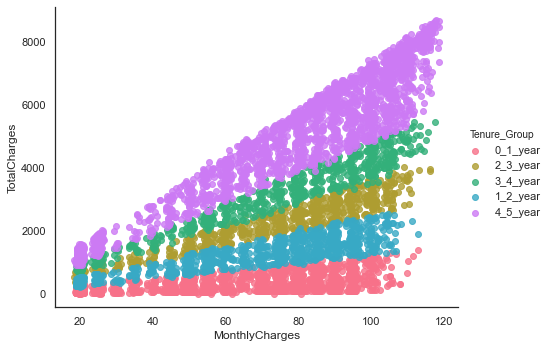

In [39]:
sns.lmplot(x = "MonthlyCharges", y= "TotalCharges", data=df,fit_reg = False,hue = "Tenure_Group",palette='husl',aspect=12/9);

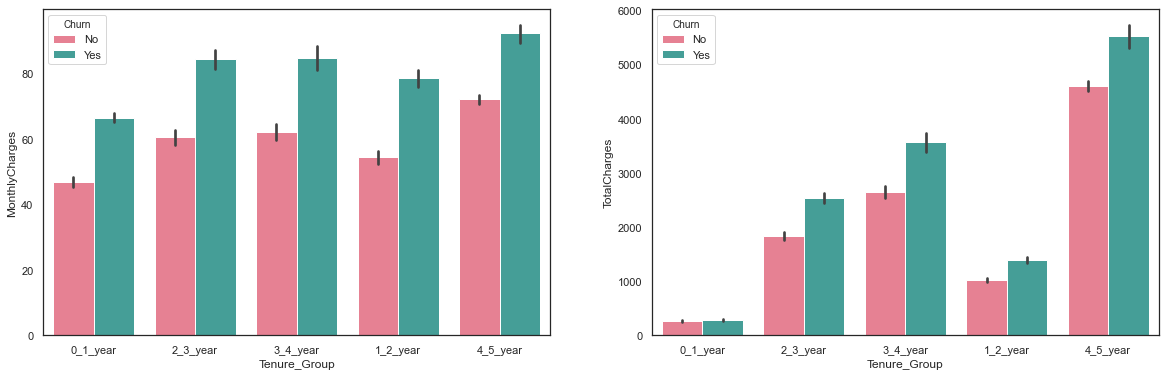

In [40]:
f, axes = plt.subplots( ncols=2, figsize=(20, 6))
sns.barplot(x='Tenure_Group',y='MonthlyCharges',data=df,palette='husl',hue = "Churn",ax = axes[0])
sns.barplot(x='Tenure_Group',y='TotalCharges',data=df,palette='husl',hue = "Churn",ax = axes[1]);

In [41]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="Telecom_Churn.html")

## Feature Engineering

#### Convert Categorical Values to Numeric

In [42]:
for col in df.dtypes[df.dtypes == object].index:
    print(col, df[col].unique()) 
# To identify the unique value types in categorical data columns 

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']
Tenure_Group ['0_1_year' '2_3_year' '3_4_year' '1_2_year' '4_5_year']


In [43]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
Tenure_Group           5
dtype: int64

In [44]:
#CustomerIDs are all unique and will not have any affect in customer churn
df.drop("customerID", axis= 1, inplace= True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
Tenure_Group        7043 non-null object
dtypes: float64(2), int64(2), ob

In [46]:
##Integer encoding churn for binary classification -- The Label we will be predicting for
df["Churn"]= df["Churn"].apply(lambda x: 0 if x=='No' else 1)

In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0_1_year
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2_3_year
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0_1_year
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3_4_year
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0_1_year


In [48]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#### Normalization of numeric datatypes

In [49]:
df["MonthlyCharges"] = df["MonthlyCharges"]/(df["MonthlyCharges"].max(axis = 0)) 

In [50]:
df["TotalCharges"] = df["TotalCharges"]/(df["TotalCharges"].max(axis = 0)) 

In [51]:
df["tenure"] = df["tenure"]/(df["tenure"].max(axis = 0)) 

In [52]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.251368,0.003437,0,0_1_year
1,Male,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.479579,0.217564,0,2_3_year
2,Male,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.453474,0.012453,1,0_1_year
3,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.356211,0.211951,0,3_4_year
4,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.595368,0.017462,1,0_1_year


In [53]:
#Label encode ordinal categorical data columns
label_encoder = preprocessing.LabelEncoder()
df['Tenure_Group']= label_encoder.fit_transform(df['Tenure_Group']) 
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.251368,0.003437,0,0
1,Male,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.479579,0.217564,0,2
2,Male,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.453474,0.012453,1,0
3,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.356211,0.211951,0,3
4,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.595368,0.017462,1,0
5,Female,0,No,No,0.111111,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.839158,0.094475,1,0
6,Male,0,No,Yes,0.305556,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0.750316,0.224461,0,1
7,Female,0,No,No,0.138889,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,0.250526,0.034762,0,0
8,Female,0,Yes,No,0.388889,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0.882526,0.350733,1,2
9,Male,0,No,Yes,0.861111,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),0.472842,0.401615,0,4


In [54]:
#One Hot Encode the nominal categorical data columns
df_ohe = pd.get_dummies(df)

In [55]:
df_ohe

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Tenure_Group,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.013889,0.251368,0.003437,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,0.472222,0.479579,0.217564,0,2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,0.027778,0.453474,0.012453,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,0.625000,0.356211,0.211951,0,3,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,0.027778,0.595368,0.017462,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.714105,0.229194,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,0,1.000000,0.869053,0.847792,0,4,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,0,0.152778,0.249263,0.039892,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,1,0.055556,0.626526,0.035303,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [56]:
df_ohe.isnull().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Tenure_Group                               0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecu

In [57]:
df_ohe.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.0
tenure,7043.0,0.449599,0.341104,0.000000,0.125000,0.402778,0.763889,1.0
MonthlyCharges,7043.0,0.545362,0.253390,0.153684,0.298947,0.592421,0.756632,1.0
TotalCharges,7043.0,0.262497,0.261007,0.000000,0.045891,0.160574,0.436003,1.0
Churn,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.0
Tenure_Group,7043.0,1.977850,1.663316,0.000000,0.000000,2.000000,4.000000,4.0
gender_Female,7043.0,0.495244,0.500013,0.000000,0.000000,0.000000,1.000000,1.0
gender_Male,7043.0,0.504756,0.500013,0.000000,0.000000,1.000000,1.000000,1.0
Partner_No,7043.0,0.516967,0.499748,0.000000,0.000000,1.000000,1.000000,1.0
Partner_Yes,7043.0,0.483033,0.499748,0.000000,0.000000,0.000000,1.000000,1.0


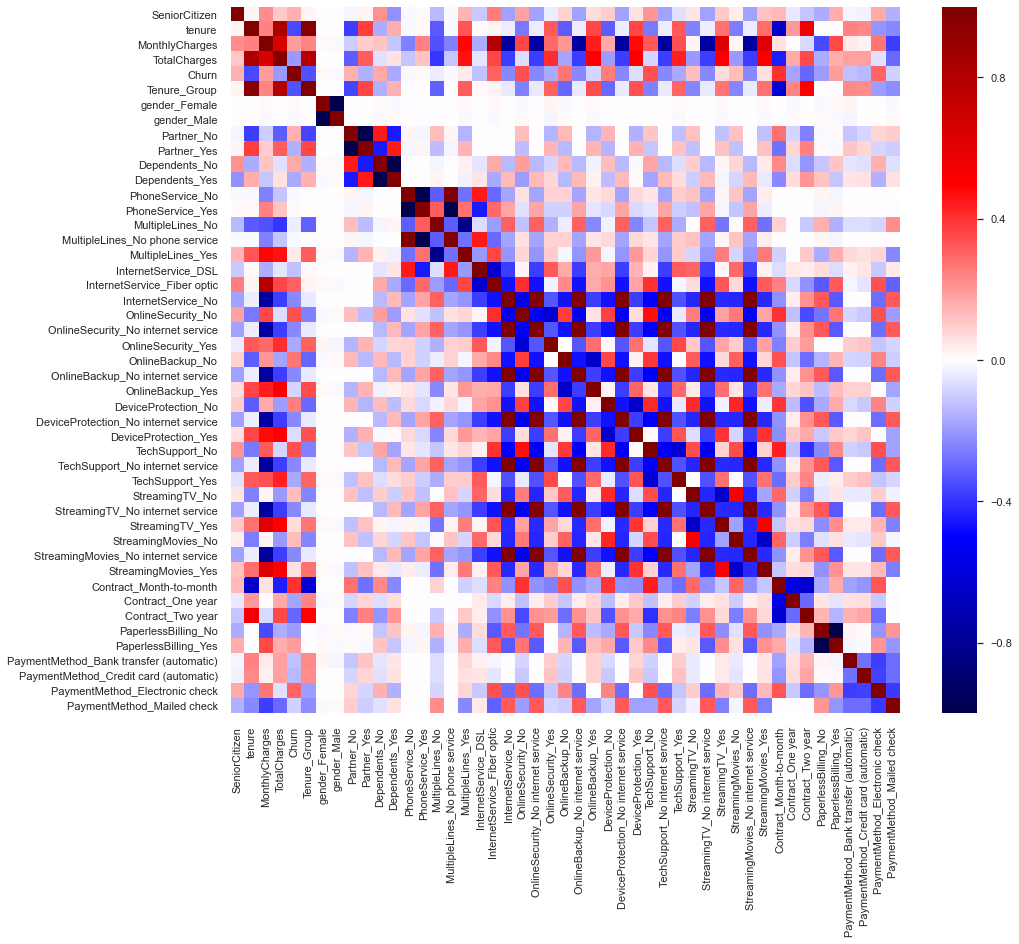

In [58]:
# Correlation Matrix
sns.set(rc={'figure.figsize':(15,13)})
sns.heatmap(df_ohe.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);


#other ideas - Have a single column for tenure group - label encode 12345
#gender
#try 01 or 0123

In [59]:
df_ohe.corr()['Churn'].sort_values()

tenure                                    -0.352229
Tenure_Group                              -0.339441
Contract_Two year                         -0.302253
InternetService_No                        -0.227890
StreamingTV_No internet service           -0.227890
TechSupport_No internet service           -0.227890
DeviceProtection_No internet service      -0.227890
StreamingMovies_No internet service       -0.227890
OnlineBackup_No internet service          -0.227890
OnlineSecurity_No internet service        -0.227890
TotalCharges                              -0.198324
PaperlessBilling_No                       -0.191825
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
Partner_Yes                               -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMetho

In [60]:
df_ohe.corr(method="pearson")

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Tenure_Group,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.150889,0.019987,0.001874,-0.001874,-0.016479,0.016479,0.211185,-0.211185,-0.008576,0.008576,-0.136213,-0.008576,0.142948,-0.108322,0.255338,-0.182742,0.185532,-0.182742,-0.038653,0.087952,-0.182742,0.066572,0.094810,-0.182742,0.059428,0.205620,-0.182742,-0.060625,0.049062,-0.182742,0.105378,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229,0.974567,-0.005106,0.005106,-0.379697,0.379697,-0.159712,0.159712,-0.008448,0.008448,-0.323088,-0.008448,0.331941,0.013274,0.019720,-0.039062,-0.263746,-0.039062,0.327203,-0.312694,-0.039062,0.360277,-0.312740,-0.039062,0.360653,-0.262143,-0.039062,0.324221,-0.245039,-0.039062,0.279756,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.193356,0.237413,0.014569,-0.014569,-0.096848,0.096848,0.113890,-0.113890,-0.247398,0.247398,-0.338314,-0.247398,0.490434,-0.160189,0.787066,-0.763557,0.360898,-0.763557,0.296594,0.210753,-0.763557,0.441780,0.171836,-0.763557,0.482692,0.322076,-0.763557,0.338304,0.016951,-0.763557,0.629603,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.103006,0.826178,0.651174,1.000000,-0.198324,0.796022,0.000080,-0.000080,-0.317504,0.317504,-0.062078,0.062078,-0.113214,0.113214,-0.396059,-0.113214,0.468504,-0.052469,0.361655,-0.375223,-0.063137,-0.375223,0.411651,-0.176276,-0.375223,0.509226,-0.188108,-0.375223,0.521983,-0.082874,-0.375223,0.431883,-0.195884,-0.375223,0.514973,-0.202188,-0.375223,0.520122,-0.444255,0.170814,0.354481,-0.158574,0.158574,0.185987,0.182915,-0.059246,-0.295758
Churn,0.150889,-0.352229,0.193356,-0.198324,1.000000,-0.339441,0.008612,-0.008612,0.150448,-0.150448,0.164221,-0.164221,-0.011942,0.011942,-0.032569,-0.011942,0.040102,-0.124214,0.308020,-0.227890,0.342637,-0.227890,-0.171226,0.268005,-0.227890,-0.082255,0.252481,-0.227890,-0.066160,0.337281,-0.227890,-0.164674,0.128916,-0.227890,0.063228,0.130845,-0.227890,0.061382,0.405103,-0.177820,-0.302253,-0.191825,0.191825,-0.117937,-0.134302,0.301919,-0.091683
Tenure_Group,0.019987,0.974567,0.237413,0.796022,-0.339441,1.000000,-0.002859,0.002859,-0.360353,0.360353,-0.151277,0.151277,-0.004299,0.004299,-0.308039,-0.004299,0.314231,0.010717,0.022459,-0.039413,-0.243736,-0.039413,0.305398,-0.298431,-0.039413,0.345692,-0.294547,-0.039413,0.341947,-0.242995,-0.039413,0.303446,-0.234435,-0.039413,0.269379,-0.239778,-0.039413,0.273923,-0.624496,0.235857,0.502351,-0.005800,0.005800,0.230527,0.221459,-0.194070,-0.225820
gender_Female,0.001874,-0.005106,0.014569,0.000080,0.008612,-0.002859,1.000000,-1.000000,-0.001808,0.001808,0.010517,-0.010517,-0.006488,0.006488,-0.004476,-0.006488,0.008414,-0.006568,0.011286,-0.006026,-0.010429,-0.006026,0.017021,-0.008191,-0.006026,0.013773,0.002988,-0.006026,0.00210

In [61]:
# store df_ohe to csv file
df_ohe.to_csv('df_ohe.csv', index=False)

## ML Model

In [62]:
X = df_ohe.drop(['Churn'], axis=1)
y = df_ohe['Churn']

# Create train, val and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=1)

In [63]:
X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape 

((5634, 46), (1409, 46), (5634,), (1409,))

In [64]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape 

((4225, 46), (1409, 46), (4225,), (1409,))

In [65]:
len(X)

7043

In [66]:
len(y)

7043

In [67]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Tenure_Group,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3897,0,1.000000,0.972632,0.970103,4,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
1980,0,0.138889,0.802105,0.117625,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
6302,0,0.069444,0.636211,0.047629,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
727,0,0.069444,0.680842,0.041003,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
5104,0,0.250000,0.169263,0.042661,1,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1


In [68]:
X_val.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Tenure_Group,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
565,0,0.986111,0.596632,0.572656,4,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0
199,0,0.013889,0.174737,0.002389,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
6738,0,0.013889,0.171368,0.002343,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
2504,0,0.027778,0.637474,0.021785,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
556,0,0.013889,0.167579,0.002291,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0


In [69]:
y_train.head()

3897    0
1980    0
6302    1
727     0
5104    0
Name: Churn, dtype: int64

In [70]:
y_val.tail()

5790    0
3834    1
806     0
6240    1
5282    1
Name: Churn, dtype: int64

### Baseline Model - Decision Tree Cassifier

In [71]:
dt = DecisionTreeClassifier(random_state=1,max_depth = 3)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_val)

print(classification_report(y_val,y_pred_dt))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1023
           1       0.71      0.42      0.53       386

    accuracy                           0.79      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

confusion matrix:
 [[889 172]
 [289  59]]


In [79]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

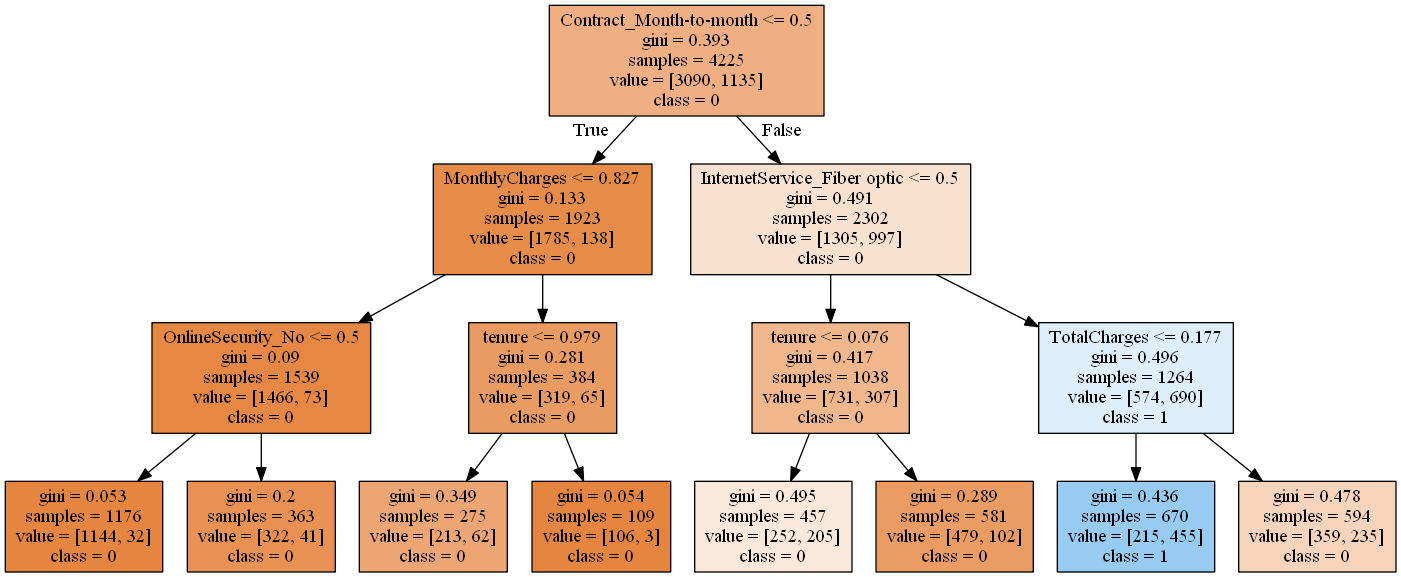

In [80]:
dt_feature_names = list(X_train.columns)
dt_target_names = np.array(y_train.unique(),dtype=np.str) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [70]:
list(zip(X.columns, dt.feature_importances_))

[('SeniorCitizen', 0.0),
 ('tenure', 0.09768786963583433),
 ('MonthlyCharges', 0.020142337805627072),
 ('TotalCharges', 0.11171762371510272),
 ('Tenure_Group', 0.0),
 ('gender_Female', 0.0),
 ('gender_Male', 0.0),
 ('Partner_No', 0.0),
 ('Partner_Yes', 0.0),
 ('Dependents_No', 0.0),
 ('Dependents_Yes', 0.0),
 ('PhoneService_No', 0.0),
 ('PhoneService_Yes', 0.0),
 ('MultipleLines_No', 0.0),
 ('MultipleLines_No phone service', 0.0),
 ('MultipleLines_Yes', 0.0),
 ('InternetService_DSL', 0.0),
 ('InternetService_Fiber optic', 0.15743856447268106),
 ('InternetService_No', 0.0),
 ('OnlineSecurity_No', 0.00900258902065807),
 ('OnlineSecurity_No internet service', 0.0),
 ('OnlineSecurity_Yes', 0.0),
 ('OnlineBackup_No', 0.0),
 ('OnlineBackup_No internet service', 0.0),
 ('OnlineBackup_Yes', 0.0),
 ('DeviceProtection_No', 0.0),
 ('DeviceProtection_No internet service', 0.0),
 ('DeviceProtection_Yes', 0.0),
 ('TechSupport_No', 0.0),
 ('TechSupport_No internet service', 0.0),
 ('TechSupport_Yes',

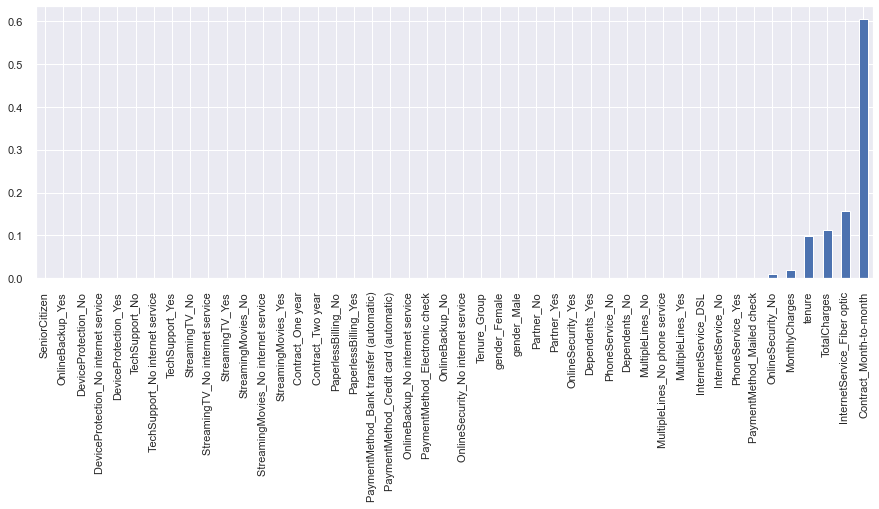

In [71]:
pd.Series(dt.feature_importances_, index= X.columns).sort_values().plot(kind = 'bar', figsize=(15,5));

In [72]:
# dropping the features with lower importances? 
#penalty l2
#class weight
#C
#max_iter

### Logistic Regression

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.63      0.58      0.61       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409

recall score: 0.5833333333333334
confusion matrix:
 [[941 120]
 [145 203]]
Area under ROC curve :  0.7351162425384858 



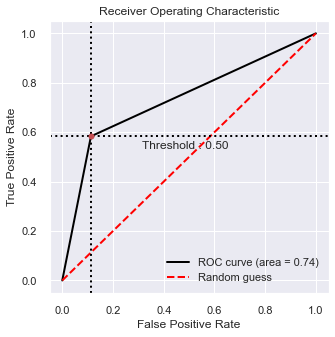

In [72]:
lr = LogisticRegression (n_jobs=-1, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test,y_pred_lr))
print('recall score:',recall_score(y_test, y_pred_lr))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred_lr))

roc_auc = roc_auc_score(y_test,y_pred_lr) 
print ("Area under ROC curve : ",roc_auc,"\n")

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred_lr, labels=["Churn"])

# Figure
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

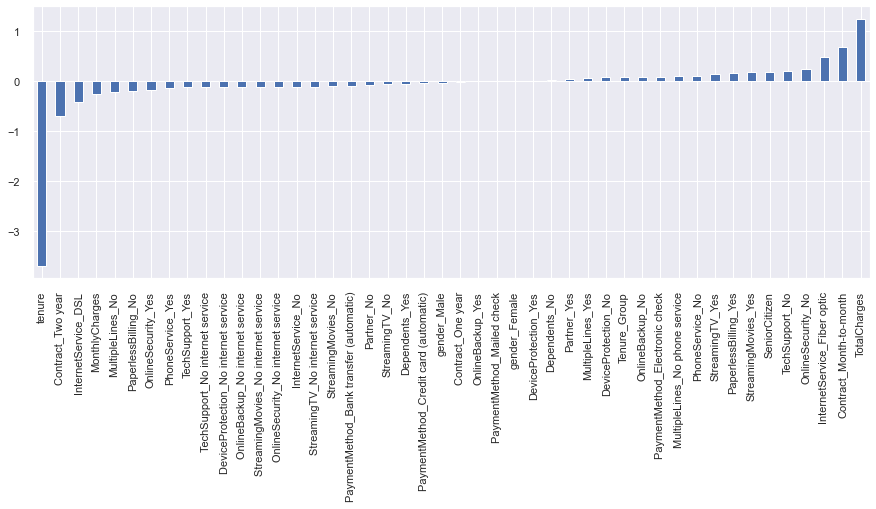

In [73]:
pd.Series(lr.coef_[0], index = X.columns).sort_values().plot(kind='bar',figsize=(15,5));

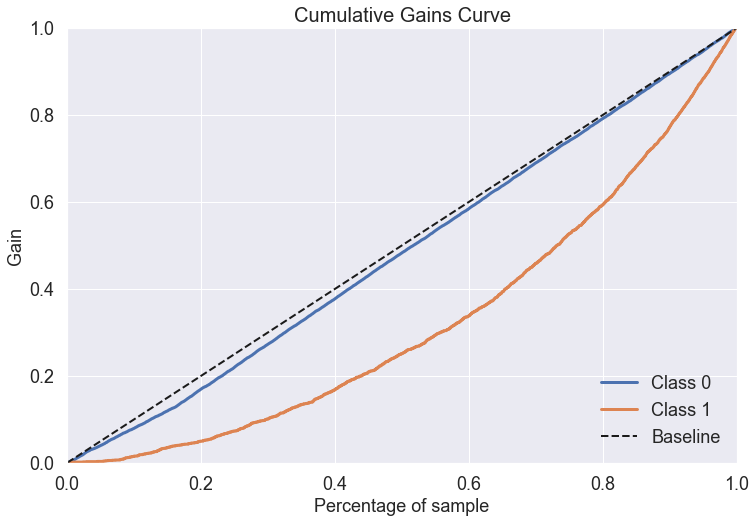

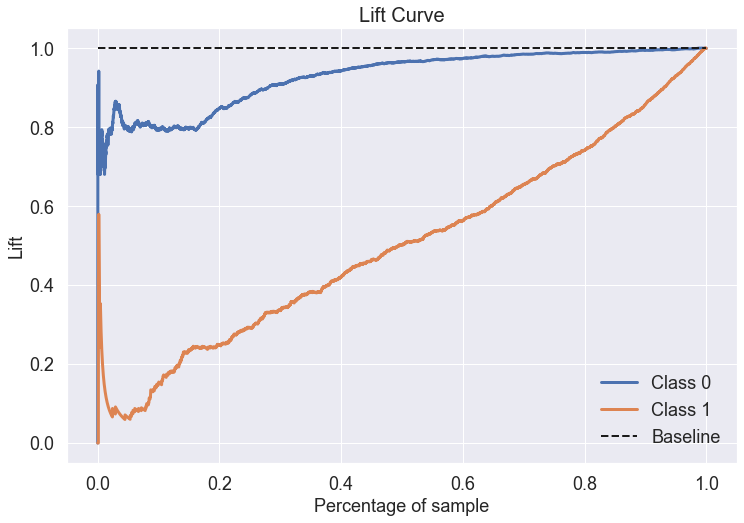

In [78]:
# get what the predicted probabilities are to use creating cumulative gains chart
predictions = lr.predict_proba(X)

skplt.metrics.plot_cumulative_gain(
    y, X, figsize=(12, 8), title_fontsize=20, text_fontsize=18
)
plt.show()

skplt.metrics.plot_lift_curve(
    y, X, figsize=(12, 8), title_fontsize=20, text_fontsize=18
)
plt.show()

### Random Forest

best_max_depth:


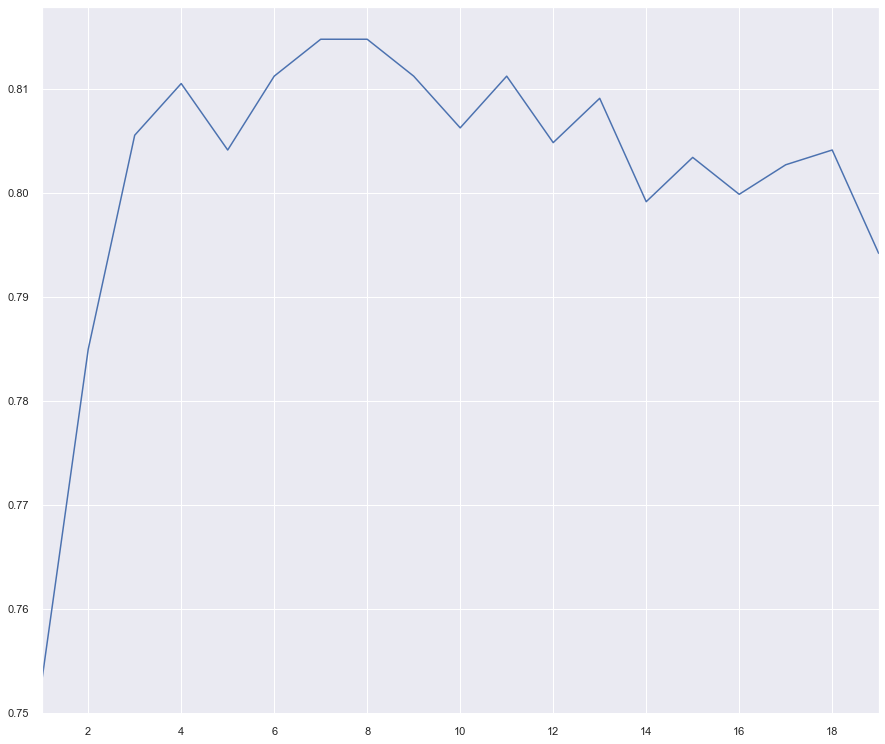

In [83]:
scores = []
for i in range(1,20):
    rf_ = RandomForestClassifier(max_depth= i, n_jobs=-1, random_state=42)
    rf_.fit(X_train, y_train)
    y_pred_rf_ = rf_.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred_rf_))

print('best_max_depth:') 
pd.Series(scores,index = range(1,20)).plot();

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1061
           1       0.57      0.52      0.54       348

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.78      0.78      0.78      1409

r2: -0.16390143759411524
MSE: 0.21646557842441447
accuracy score: 0.7835344215755855
confusion matrix:
 [[923 138]
 [167 181]]
Area under ROC curve :  0.6950244835169597 



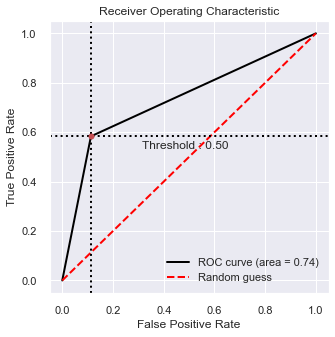

In [84]:
rf = RandomForestClassifier(max_depth=9, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

print(classification_report(y_test,y_pred_rf))
print('r2:', r2_score(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('accuracy score:',accuracy_score(y_test, y_pred_rf))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred_rf))

roc_auc = roc_auc_score(y_test,y_pred_rf) 
print ("Area under ROC curve : ",roc_auc,"\n")
bc_rf = BinaryClassification(y_test, y_pred_rf, labels=["Churn"])

# Figure
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

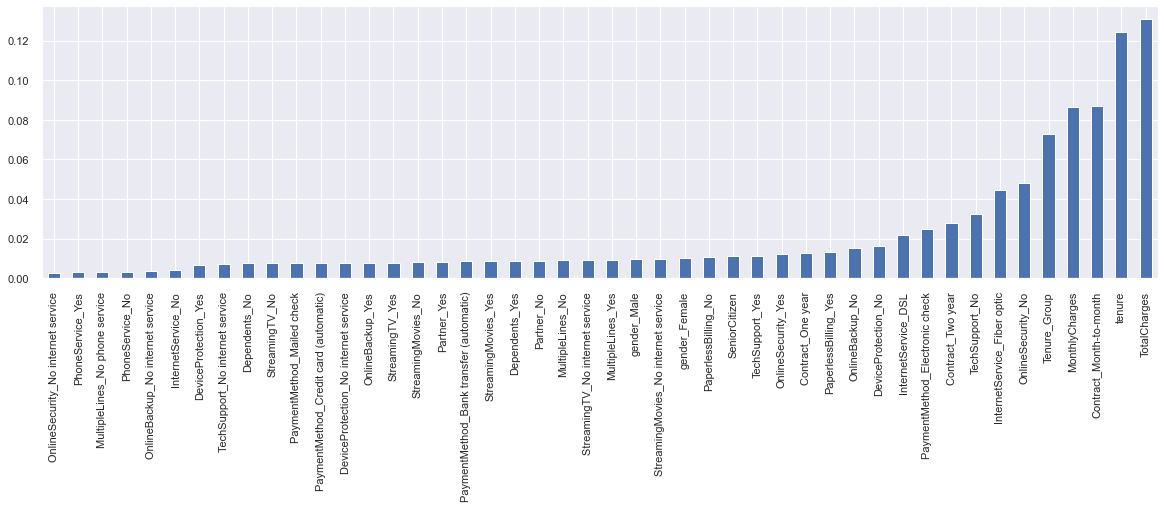

In [85]:
pd.Series(rf.feature_importances_, index = X.columns).sort_values().plot(kind='bar',figsize=(20,5));

In [ ]:
from yellowbrick.features import ParallelCoordinates
from yellowbrick.datasets import load_occupancy


##### Hyperparameter Tuning 

In [86]:
from imblearn.pipeline import make_pipeline

pipe = Pipeline([ 
    ('scaler', MinMaxScaler()),
    ('model', RandomForestClassifier())
])

parameters = {
    'model__n_estimators' : range(0,20),
    'model__max_depth' : range(0,20),
    'model__criterion' : ['gini', 'entropy'],
}

gs = GridSearchCV(pipe, parameters, scoring = 'recall', cv = 5, n_jobs = 1, verbose = 10)
gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=1 
[CV]  model__criterion=gi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=4, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=4, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=4, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=5 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=5, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=5 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=5, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=5 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=5, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estima

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=7, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=8 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=8, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=8 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=8, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=8 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=8, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=8 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=8, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=8 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=8, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estima

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=11, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=11, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=11, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=12, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=12, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=12, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, mode

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=14, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=15 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=15, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=15 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=15, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=15 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=15, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=15 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=15, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=15 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=15, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, mode

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=18, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=18 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=18, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=18 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=18, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=18 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=18, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=18 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=18, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, model__n_estimators=19 
[CV]  model__criterion=gini, model__max_depth=0, model__n_estimators=19, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth=0, mode

[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=9, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, model__n_estimators=9 
[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=9, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, model__n_estimators=9 
[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=9, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, model__n_estimators=9 
[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=9, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=10, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, model__n_estimators=10 
[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=10, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1,

[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=19, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, model__n_estimators=19 
[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=19, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, model__n_estimators=19 
[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=19, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, model__n_estimators=19 
[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=19, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=1, model__n_estimators=19 
[CV]  model__criterion=gini, model__max_depth=1, model__n_estimators=19, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=0 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=gini, model__max_depth

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=1, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=1, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=1, score=0.467, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=2, score=0.339, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=2, score=0.181, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=2, score=0.304, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, mod

[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=11, score=0.273, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=11, score=0.154, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=11, score=0.242, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=12, score=0.229, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=12, score=0.000, total=   0.0s
[CV] model__criterion=gini, model__max_depth=2, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=2, model__n_estimators=12, score=0.238, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=1, score=0.361, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=1, score=0.322, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=1, score=0.216, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=2, score=0.396, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=2, score=0.326, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=2, score=0.419, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, mod

[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=12, score=0.335, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=12, score=0.348, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=12, score=0.339, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=13, score=0.295, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=13, score=0.344, total=   0.0s
[CV] model__criterion=gini, model__max_depth=3, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=3, model__n_estimators=13, score=0.383, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=3, score=0.357, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=3, score=0.405, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=3, score=0.445, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=3, score=0.419, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=4, score=0.458, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=4, score=0.352, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, mod

[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=13, score=0.489, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=13, score=0.348, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=13, score=0.392, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=13, score=0.388, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=13, score=0.423, total=   0.0s
[CV] model__criterion=gini, model__max_depth=4, model__n_estimators=14 
[CV]  model__criterion=gini, model__max_depth=4, model__n_estimators=14, score=0.449, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=1, score=0.643, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=2, score=0.515, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=2, score=0.410, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=2, score=0.449, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=2, score=0.396, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=2, score=0.427, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, mod

[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=11, score=0.449, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=11, score=0.520, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=12, score=0.520, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=12, score=0.414, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=12, score=0.432, total=   0.0s
[CV] model__criterion=gini, model__max_depth=5, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=5, model__n_estimators=12, score=0.476, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=1, score=0.604, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=2, score=0.485, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=2, score=0.432, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=2, score=0.370, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=2, score=0.480, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=2, score=0.533, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, mod

[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=12, score=0.520, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=12, score=0.419, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=12, score=0.454, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=12, score=0.498, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=12, score=0.463, total=   0.0s
[CV] model__criterion=gini, model__max_depth=6, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=6, model__n_estimators=13, score=0.533, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=1, score=0.498, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=2, score=0.537, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=2, score=0.405, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=2, score=0.480, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=2, score=0.507, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=2, score=0.520, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, mod

[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=12, score=0.476, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=12, score=0.498, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=12, score=0.502, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=13, score=0.524, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=13, score=0.445, total=   0.0s
[CV] model__criterion=gini, model__max_depth=7, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=7, model__n_estimators=13, score=0.445, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=2, score=0.568, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=2, score=0.410, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=2, score=0.471, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=2, score=0.441, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=2, score=0.502, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=3, score=0.533, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, mod

[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=12, score=0.520, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=12, score=0.502, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=13, score=0.529, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=13, score=0.463, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=13, score=0.445, total=   0.0s
[CV] model__criterion=gini, model__max_depth=8, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=8, model__n_estimators=13, score=0.480, total=   0.1s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=1, score=0.414, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=1, score=0.564, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=1, score=0.551, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=1, score=0.542, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=2, score=0.559, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=2, score=0.419, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, mod

[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=11, score=0.542, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=11, score=0.463, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=11, score=0.489, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=11, score=0.502, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=11, score=0.537, total=   0.0s
[CV] model__criterion=gini, model__max_depth=9, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=9, model__n_estimators=12, score=0.498, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti


[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=3, score=0.467, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=3, score=0.515, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=3, score=0.533, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=4, score=0.577, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=4, score=0.405, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=4, score=0.471, total=   0.0s
[CV] model__criterion=gini, model__max_

[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=13, score=0.529, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=13, score=0.454, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=13, score=0.507, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=13, score=0.502, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=13, score=0.529, total=   0.0s
[CV] model__criterion=gini, model__max_depth=10, model__n_estimators=14 
[CV]  model__criterion=gini, model__max_depth=10, model__n_estimators=14, score=0.581, total=   0.0s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=3, score=0.414, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=3, score=0.467, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=3, score=0.467, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=3, score=0.520, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=4, score=0.511, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=4, score=0.467, total=   0.0s
[CV] model__criterion=gini, model__max_d

[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=13, score=0.445, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=13, score=0.533, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=13, score=0.524, total=   0.0s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=14 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=14, score=0.542, total=   0.1s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=14 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=14, score=0.458, total=   0.1s
[CV] model__criterion=gini, model__max_depth=11, model__n_estimators=14 
[CV]  model__criterion=gini, model__max_depth=11, model__n_estimators=14, score=0.493, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=3, score=0.454, total=   0.0s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=3, score=0.520, total=   0.0s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=3, score=0.537, total=   0.0s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=3, score=0.454, total=   0.0s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=4, score=0.467, total=   0.0s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=4, score=0.445, total=   0.0s
[CV] model__criterion=gini, model__max_d

[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=13, score=0.542, total=   0.0s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=13, score=0.383, total=   0.0s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=13, score=0.493, total=   0.1s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=13, score=0.507, total=   0.0s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=13, score=0.498, total=   0.0s
[CV] model__criterion=gini, model__max_depth=12, model__n_estimators=14 
[CV]  model__criterion=gini, model__max_depth=12, model__n_estimators=14, score=0.555, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=3, score=0.419, total=   0.0s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=3, score=0.537, total=   0.0s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=3, score=0.493, total=   0.0s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=3, score=0.568, total=   0.0s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=4, score=0.520, total=   0.0s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=4, score=0.436, total=   0.0s
[CV] model__criterion=gini, model__max_d

[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=12, score=0.489, total=   0.0s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=13, score=0.524, total=   0.0s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=13, score=0.436, total=   0.0s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=13, score=0.511, total=   0.1s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=13, score=0.489, total=   0.1s
[CV] model__criterion=gini, model__max_depth=13, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=13, model__n_estimators=13, score=0.529, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=1, score=0.493, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=1, score=0.502, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=2, score=0.379, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=2, score=0.339, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=2, score=0.352, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=2, score=0.361, total=   0.0s
[CV] model__criterion=gini, model__max_d

[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=11, score=0.520, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=11 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=11, score=0.485, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=12, score=0.507, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=12, score=0.419, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=12, score=0.502, total=   0.0s
[CV] model__criterion=gini, model__max_depth=14, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=14, model__n_estimators=12, score=0.502, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=3, score=0.471, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=3, score=0.502, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=3, score=0.533, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=3, score=0.489, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=4, score=0.449, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=4, score=0.392, total=   0.0s
[CV] model__criterion=gini, model__max_d

[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=13, score=0.542, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=13, score=0.441, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=13, score=0.498, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=13, score=0.493, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=13, score=0.515, total=   0.0s
[CV] model__criterion=gini, model__max_depth=15, model__n_estimators=14 
[CV]  model__criterion=gini, model__max_depth=15, model__n_estimators=14, score=0.511, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=1, score=0.546, total=   0.0s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=1, score=0.427, total=   0.0s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=1 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=1, score=0.471, total=   0.0s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=2, score=0.322, total=   0.0s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=2, score=0.317, total=   0.0s
[CV] model__criterion=gini, model__max_depth=16, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=16, model__n_estimators=2, score=0.326, total=   0.0s
[CV] model__criterion=gini, model__max_d

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=2, score=0.264, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=2, score=0.357, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=2, score=0.300, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=2, score=0.357, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=3, score=0.502, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=3, score=0.463, total=   0.0s
[CV] model__criterion=gini, model__max_d

[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=12, score=0.445, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=12, score=0.436, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=12, score=0.436, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=13, score=0.498, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=13, score=0.432, total=   0.0s
[CV] model__criterion=gini, model__max_depth=17, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=17, model__n_estimators=13, score=0.485, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=3, score=0.502, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=3, score=0.480, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=3, score=0.520, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=3, score=0.498, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=3, score=0.502, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=4 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=4, score=0.379, total=   0.0s
[CV] model__criterion=gini, model__max_d

[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=13, score=0.489, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=13, score=0.423, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=13, score=0.515, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=13, score=0.498, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=13, score=0.507, total=   0.0s
[CV] model__criterion=gini, model__max_depth=18, model__n_estimators=14 
[CV]  model__criterion=gini, model__max_depth=18, model__n_estimators=14, score=0.480, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=2, score=0.374, total=   0.0s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=2, score=0.256, total=   0.0s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=2, score=0.304, total=   0.0s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=2, score=0.304, total=   0.0s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=2 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=2, score=0.313, total=   0.0s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=3 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=3, score=0.533, total=   0.0s
[CV] model__criterion=gini, model__max_d

[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=12, score=0.410, total=   0.0s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=12, score=0.441, total=   0.0s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=12, score=0.432, total=   0.0s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=12 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=12, score=0.498, total=   0.0s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=13, score=0.507, total=   0.1s
[CV] model__criterion=gini, model__max_depth=19, model__n_estimators=13 
[CV]  model__criterion=gini, model__max_depth=19, model__n_estimators=13, score=0.414, total=   0.1s
[CV] model__criterion=gini, m

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=4, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=4, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=4, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=4, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=4, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=5 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=5, score=nan, total=   0.0s
[CV] model__criterion=entropy,

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=7, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=7 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=7, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=8 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=8, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=8 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=8, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=8 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=8, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=8 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=8, score=nan, total=   0.0s
[CV] model__criterion=entropy,

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=11, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=11, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=11, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=11, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=11, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=12, score=nan, total=   0.0s
[CV] model__criteri

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=13, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=14, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=14, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=14, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=14, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=14, score=nan, total=   0.0s
[CV] model__criteri

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=17, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=17 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=17, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=17 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=17, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=17 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=17, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=18 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=18, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=0, model__n_estimators=18 
[CV]  model__criterion=entropy, model__max_depth=0, model__n_estimators=18, score=nan, total=   0.0s
[CV] model__criteri

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=1, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=1, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=1, score=0.000, total=   0.0s
[CV] model__criterion=en

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)


[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=3, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=3, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=4, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=4, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=4, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=4, score=0.000, total=   0.0s
[CV] model__criter

[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=13, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=13, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=13, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=13, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=13, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=1, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=1, model__n_estimators=14, score=0.000, total=   0.0s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=2, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=3, score=0.220, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=3, score=0.264, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=3, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=3, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=3, score=0.357, total=   0.0s
[CV] model__criter

[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=13, score=0.260, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=13, score=0.057, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=13, score=0.000, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=14, score=0.216, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=14, score=0.141, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=2, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=2, model__n_estimators=14, score=0.286, total=   0.0s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=2, score=0.423, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=3, score=0.396, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=3, score=0.256, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=3, score=0.401, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=3, score=0.322, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=3, score=0.352, total=   0.0s
[CV] model__criter

[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=13, score=0.295, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=13, score=0.348, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=13, score=0.357, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=13, score=0.344, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=14, score=0.392, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=3, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=3, model__n_estimators=14, score=0.278, total=   0.0s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=3, score=0.401, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=3, score=0.344, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=3, score=0.467, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=3, score=0.533, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=3, score=0.308, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=4, score=0.467, total=   0.0s
[CV] model__criter

[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=12, score=0.344, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=13, score=0.507, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=13, score=0.300, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=13, score=0.330, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=13, score=0.392, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=4, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=4, model__n_estimators=13, score=0.374, total=   0.0s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=1, score=0.269, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=1, score=0.410, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=2, score=0.419, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=2, score=0.396, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=2, score=0.489, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=2, score=0.467, total=   0.0s
[CV] model__criter

[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=11, score=0.379, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=11, score=0.445, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=11, score=0.502, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=11, score=0.493, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=12, score=0.493, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=5, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=5, model__n_estimators=12, score=0.405, total=   0.0s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=3, score=0.489, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=3, score=0.414, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=3, score=0.454, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=3, score=0.507, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=3, score=0.467, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=4, score=0.489, total=   0.0s
[CV] model__criter

[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=13, score=0.419, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=13, score=0.471, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=13, score=0.445, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=14, score=0.546, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=14, score=0.405, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=6, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=6, model__n_estimators=14, score=0.432, total=   0.0s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=2, score=0.542, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=2, score=0.551, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=3, score=0.511, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=3, score=0.370, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=3, score=0.476, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=3, score=0.498, total=   0.0s
[CV] model__criter

[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=12, score=0.480, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=12, score=0.485, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=13, score=0.546, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=13, score=0.427, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=13, score=0.458, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=7, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=7, model__n_estimators=13, score=0.502, total=   0.0s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=2, score=0.463, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=2, score=0.485, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=2, score=0.559, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=3, score=0.546, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=3, score=0.432, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=3, score=0.480, total=   0.0s
[CV] model__criter

[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=11, score=0.529, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=12, score=0.559, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=12, score=0.445, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=12, score=0.463, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=12, score=0.511, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=8, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=8, model__n_estimators=12, score=0.524, total=   0.0s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=3, score=0.423, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=3, score=0.555, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=3, score=0.471, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=4, score=0.537, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=4, score=0.427, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=4, score=0.436, total=   0.0s
[CV] model__criter

[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=13, score=0.515, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=13, score=0.524, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=14, score=0.542, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=14, score=0.476, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=14, score=0.476, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=9, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=9, model__n_estimators=14, score=0.520, total=   0.0s
[CV] mo

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=3, score=0.476, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=3, score=0.520, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=3, score=0.529, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=4, score=0.533, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=4, score=0.467, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=4, score=0.489, total=   0.0s
[CV] mo

[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=13, score=0.498, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=13, score=0.533, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=13, score=0.551, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=14, score=0.546, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=14, score=0.458, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=10, model__n_estimators=14 
[CV]  model__criterion=entropy, model__max_depth=10, model__n_estimators=14, score=0.480, total=   0

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=1, score=0.445, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=1, score=0.410, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=2, score=0.489, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=2, score=0.454, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=2, score=0.471, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=2, score=0.498, total=   0.0s
[CV] mo

[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=11, score=0.515, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=11, score=0.502, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=11, score=0.515, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=12, score=0.537, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=12, score=0.441, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=11, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=11, model__n_estimators=12, score=0.502, total=   0

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=1, score=0.577, total=   0.0s
[CV] model__crite

[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=9, score=0.524, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=9 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=9, score=0.515, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=10, score=0.542, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=10, score=0.467, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=10, score=0.507, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=10, score=0.511, total=   0.0s

[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=19, score=0.467, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=19 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=19, score=0.493, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=19 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=19, score=0.515, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=12, model__n_estimators=19 
[CV]  model__criterion=entropy, model__max_depth=12, model__n_estimators=19, score=0.559, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=0, score=nan, total=   0.0s
[CV]

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti


[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=2, score=0.427, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=3, score=0.480, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=3, score=0.471, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=3, score=0.493, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=3, score=0.489, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=3 
[CV]  model__criterion=entropy, mo

[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=12, score=0.489, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=12, score=0.524, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=12, score=0.555, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=13, score=0.555, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=13, score=0.454, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=13, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=13, model__n_estimators=13, score=0.511, total=   0

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=3, score=0.568, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=3, score=0.493, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=3, score=0.498, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=3, score=0.493, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=3, score=0.542, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=4, score=0.524, total=   0.1s
[CV] mo

[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=12, score=0.449, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=12, score=0.485, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=12, score=0.493, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=12, score=0.458, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=13, score=0.551, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=14, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=14, model__n_estimators=13, score=0.480, total=   0

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=1, score=0.458, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=1, score=0.507, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=1, score=0.410, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=1, score=0.564, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=2, score=0.392, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=2, score=0.317, total=   0.0s
[CV] mo

[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=10, score=0.485, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=10, score=0.498, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=11, score=0.515, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=11, score=0.441, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=11, score=0.498, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=15, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=15, model__n_estimators=11, score=0.476, total=   0

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=1, score=0.511, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=1, score=0.480, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=1, score=0.432, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=2, score=0.374, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=2, score=0.286, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=2, score=0.313, total=   0.0s
[CV] mo

[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=10, score=0.489, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=10, score=0.463, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=11, score=0.542, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=11, score=0.432, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=11, score=0.480, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=16, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=11, score=0.480, total=   0

[CV]  model__criterion=entropy, model__max_depth=16, model__n_estimators=19, score=0.502, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=0 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=0, score=nan, total=   0.0s
[CV] model__crit

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=3, score=0.410, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=3, score=0.529, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=3, score=0.507, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=3, score=0.471, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=4, score=0.405, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=4, score=0.330, total=   0.0s
[CV] mo

[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=12, score=0.493, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=12, score=0.471, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=12, score=0.476, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=13, score=0.520, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=13, score=0.441, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=17, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=17, model__n_estimators=13, score=0.471, total=   0

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=3, score=0.427, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=3, score=0.498, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=3, score=0.423, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=3 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=3, score=0.537, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=4, score=0.410, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=4 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=4, score=0.366, total=   0.0s
[CV] mo

[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=12, score=0.441, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=12, score=0.467, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=12 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=12, score=0.467, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=13, score=0.515, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=13, score=0.388, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=18, model__n_estimators=13 
[CV]  model__criterion=entropy, model__max_depth=18, model__n_estimators=13, score=0.498, total=   0

C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sarav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Esti

[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=1, score=0.467, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=1, score=0.537, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=1, score=0.476, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=1 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=1, score=0.445, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=2, score=0.374, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=2 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=2, score=0.242, total=   0.0s
[CV] mo

[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=10, score=0.419, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=10, score=0.441, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=10 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=10, score=0.458, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=11, score=0.520, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=11, score=0.405, total=   0.0s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=11 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=11, score=0.520, total=   0

[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=19, score=0.524, total=   0.1s
[CV] model__criterion=entropy, model__max_depth=19, model__n_estimators=19 
[CV]  model__criterion=entropy, model__max_depth=19, model__n_estimators=19, score=0.507, total=   0.1s


[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:  2.1min finished


{'model__criterion': 'gini', 'model__max_depth': 9, 'model__n_estimators': 1}

In [87]:
model = RandomForestClassifier(max_depth=8, criterion='entropy', n_estimators=3, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores.append(accuracy_score(y_test,y_pred))
    
print(classification_report(y_test,y_pred))
print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.61      0.58      0.59       348

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.80      0.80      1409

r2: -0.04941932897830048
MSE: 0.19517388218594747
accuracy score: 0.8048261178140526
confusion matrix:
 [[933 128]
 [147 201]]


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.61      0.58      0.59       348

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.80      0.80      1409

r2: -0.04941932897830048
MSE: 0.19517388218594747
accuracy score: 0.8048261178140526
recall score: 0.5775862068965517
confusion matrix:
 [[933 128]
 [147 201]]
Area under ROC curve :  0.7284726510448828 



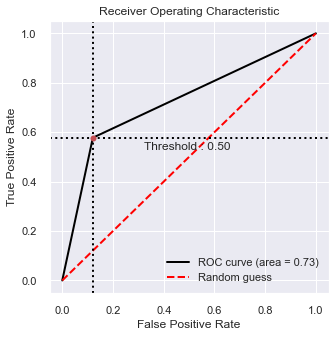

In [88]:
model = RandomForestClassifier(max_depth=8, criterion='entropy', n_estimators=3, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores.append(accuracy_score(y_test,y_pred))
    
print(classification_report(y_test,y_pred))
print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('recall score:',recall_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test,y_pred) 
print ("Area under ROC curve : ",roc_auc,"\n")

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Churn"])

# Figure
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

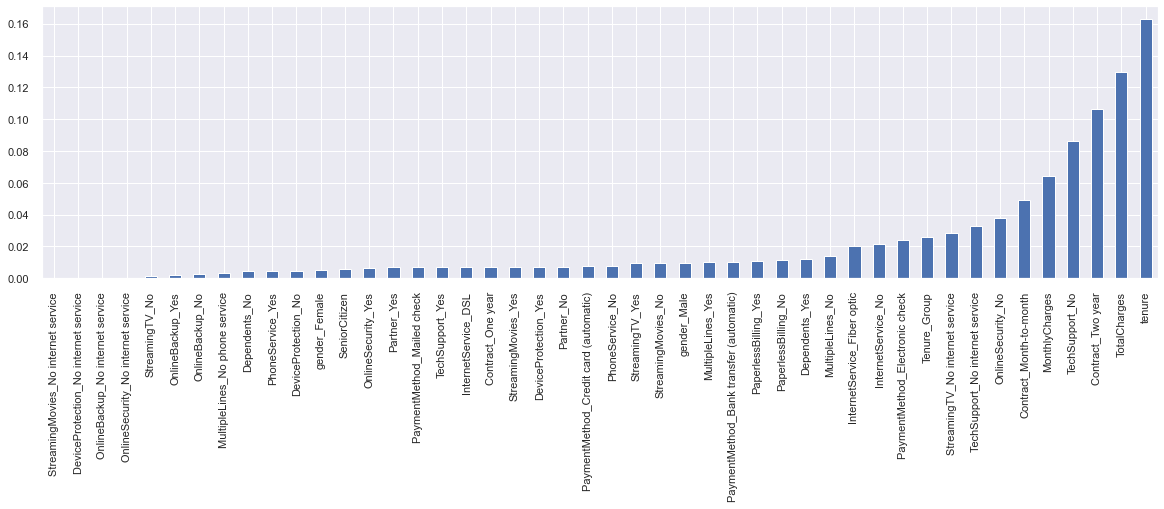

In [89]:
pd.Series(model.feature_importances_, index = X.columns).sort_values().plot(kind='bar',figsize=(20,5));

## XGBoost

In [99]:
import xgboost as xgb

In [91]:
xgb?

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1061
           1       0.57      0.52      0.54       348

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.78      0.78      0.78      1409

r2: -0.16390143759411524
MSE: 0.21646557842441447
accuracy score: 0.7835344215755855
recall score: 0.5201149425287356
confusion matrix:
 [[923 138]
 [167 181]]
Area under ROC curve :  0.6950244835169597 



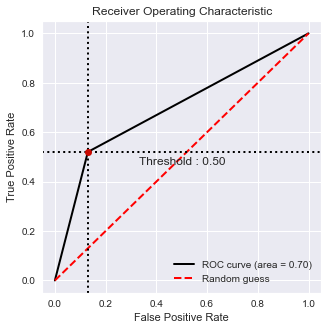

In [113]:
xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
scores.append(accuracy_score(y_test,y_pred))
    

print(classification_report(y_test,y_pred))
print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('recall score:',recall_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test,y_pred) 
print ("Area under ROC curve : ",roc_auc,"\n")

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Churn"])

# Figure
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [114]:
#pip install yellowbrick

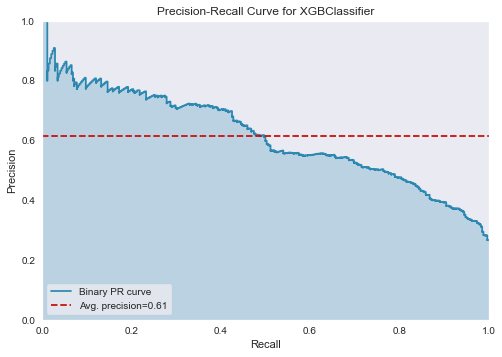

In [118]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import PrecisionRecallCurve
visualizer = PrecisionRecallCurve(xgb, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

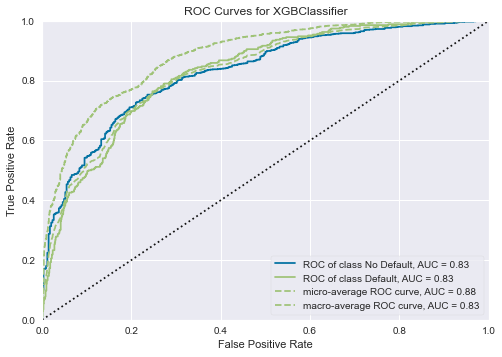

In [120]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

visualizer = ROCAUC(xgb, classes=["No Default", "Default"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

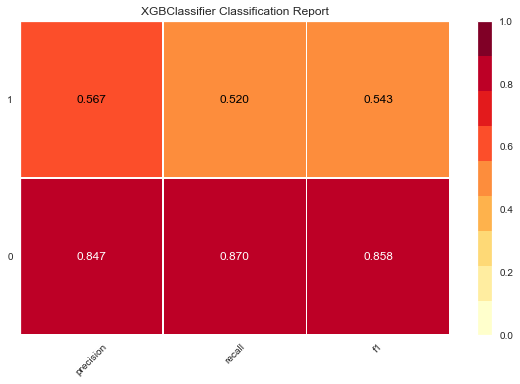

In [117]:
from yellowbrick.classifier import ( ClassificationReport, DiscriminationThreshold,)

visualizer = ClassificationReport(xgb)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

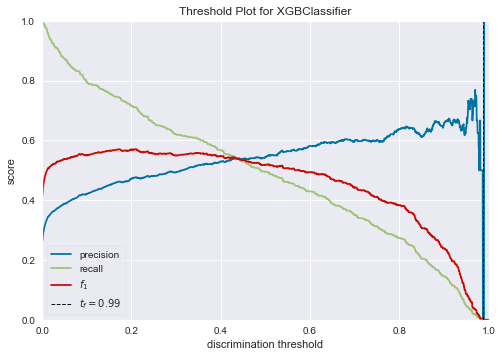

In [119]:
visualizer = DiscriminationThreshold(xgb,
                                     n_trials=1,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude = "queue_rate")

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

#### Lets go ahead with Logistic Regression as the score for Random Forest and Logistic Regression is almost similar and LR is much simpler and easier to interpret 

### Selected Algorithm: Logistic Regression

### Oversampling with SMOTE

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1061
           1       0.57      0.67      0.61       348

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.81      0.79      0.80      1409

r2: -0.11429252386059541
MSE: 0.20723917672107878
accuracy score: 0.7927608232789212
recall score: 0.6695402298850575
confusion matrix:
 [[884 177]
 [115 233]]
Area under ROC curve :  0.7513582393534618 



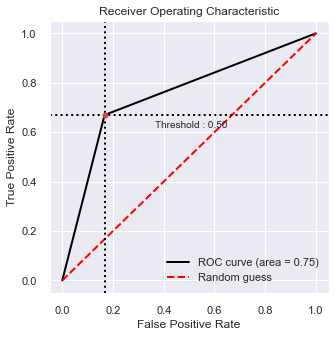

In [79]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = sampler.fit_sample(X_train,y_train)

lr = LogisticRegression(random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))
print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('recall score:',recall_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test,y_pred) 
print ("Area under ROC curve : ",roc_auc,"\n")

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Churn"])

# Figure
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

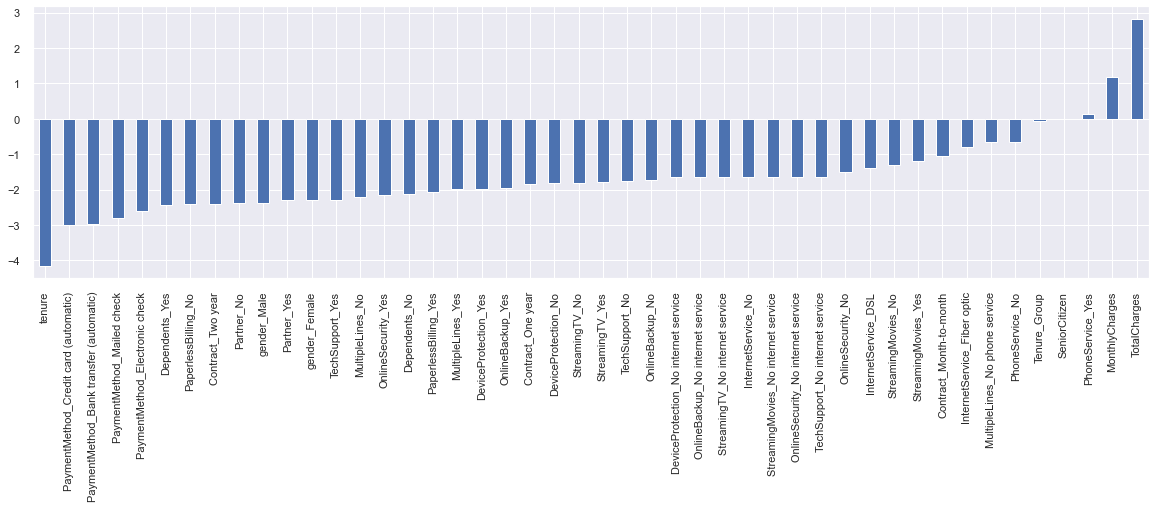

In [81]:
pd.Series(lr.coef_[0], index = X.columns).sort_values().plot(kind='bar',figsize=(20,5));

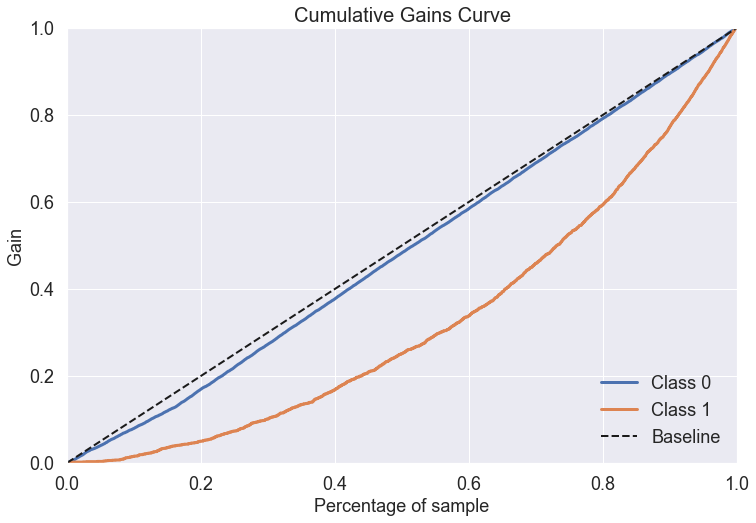

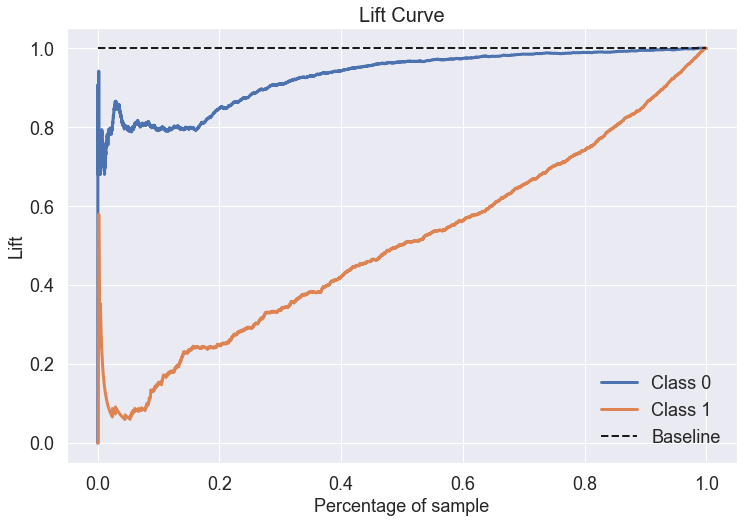

In [86]:
predictions = lr.predict_proba(X_train)

skplt.metrics.plot_cumulative_gain(
    y, X, figsize=(12, 8), title_fontsize=20, text_fontsize=18
)
plt.show()

skplt.metrics.plot_lift_curve(
    y, X, figsize=(12, 8), title_fontsize=20, text_fontsize=18
)
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1061
           1       0.55      0.59      0.57       348

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.79      0.78      0.78      1409

r2: -0.17916571874289033
MSE: 0.21930447125621008
accuracy score: 0.7806955287437899
recall score: 0.5948275862068966
confusion matrix:
 [[893 168]
 [141 207]]
Area under ROC curve :  0.7182431993239949 



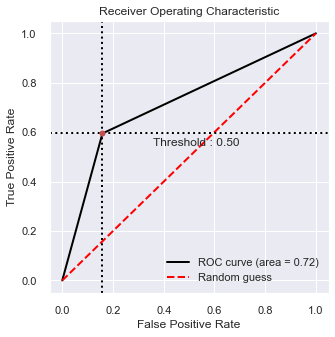

In [95]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = sampler.fit_sample(X_train,y_train)

model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('recall score:',recall_score(y_test, y_pred))
print('confusion matrix:\n',confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test,y_pred) 
print ("Area under ROC curve : ",roc_auc,"\n")

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Churn"])

# Figure
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Cross Validation using StratifiedKFold

In [96]:
# define how to split into folds
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
acc_scores = []
rec_scores=[]
# pass X into kf.Split(X) to split X as defined by kf
# Loop over each fold, get test and train sets for each fold
for train_index, test_index in kf.split(X_train,y_train):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y[train_index], y[test_index]
    
    # do over sampling because data set is imbalanced
    sampler = SMOTE(random_state=0)
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_tr, y_tr)
    
    # run  model on this fold
    moel = LogisticRegression(random_state=42)
    model.fit(X_train_resampled, y_train_resampled)
    # predict
    y_pred = model.predict(X_ts)
    # evaluate
    acc = accuracy_score(y_ts, y_pred)
    rec = recall_score(y_ts, y_pred)
    acc_scores.append(acc)
    rec_scores.append(rec)
 

In [97]:
acc_scores, rec_scores

([0.7928994082840237,
  0.8130177514792899,
  0.8011834319526627,
  0.7727810650887574,
  0.7810650887573964],
 [0.5974025974025974,
  0.6805555555555556,
  0.6,
  0.601010101010101,
  0.7012448132780082])

In [98]:
from statistics import mean
mean(acc_scores), mean(rec_scores)

(0.792189349112426, 0.6360426134492524)

In [7]:
import sklearn.metrics
import pandas as pd

def calc_cumulative_gains(df: pd.DataFrame, actual_col: str, predicted_col:str, probability_col:str):

    df.sort_values(by=probability_col, ascending=False, inplace=True)

    subset = df[df[predicted_col] == True]

    rows = []
    for group in np.array_split(subset, 10):
        score = sklearn.metrics.accuracy_score(group[actual_col].tolist(),
                                                   group[predicted_col].tolist(),
                                                   normalize=False)

        rows.append({'NumCases': len(group), 'NumCorrectPredictions': score})

    lift = pd.DataFrame(rows)

    #Cumulative Gains Calculation
    lift['RunningCorrect'] = lift['NumCorrectPredictions'].cumsum()
    lift['PercentCorrect'] = lift.apply(
        lambda x: (100 / lift['NumCorrectPredictions'].sum()) * x['RunningCorrect'], axis=1)
    lift['CumulativeCorrectBestCase'] = lift['NumCases'].cumsum()
    lift['PercentCorrectBestCase'] = lift['CumulativeCorrectBestCase'].apply(
        lambda x: 100 if (100 / lift['NumCorrectPredictions'].sum()) * x > 100 else (100 / lift[
            'NumCorrectPredictions'].sum()) * x)
    lift['AvgCase'] = lift['NumCorrectPredictions'].sum() / len(lift)
    lift['CumulativeAvgCase'] = lift['AvgCase'].cumsum()
    lift['PercentAvgCase'] = lift['CumulativeAvgCase'].apply(
        lambda x: (100 / lift['NumCorrectPredictions'].sum()) * x)

    #Lift Chart
    lift['NormalisedPercentAvg'] = 1
    lift['NormalisedPercentWithModel'] = lift['PercentCorrect'] / lift['PercentAvgCase']

    return lift

# two prediction to make one - Ensemble - Boosting? XG Boost

### Feature engg - drop ones near zero and correlational variables drop one of them

## LIME SHAP - Model Interpretation - gives you info about how features affect? to explain your model

#ROC curve